<a href="https://colab.research.google.com/github/JayP127/Climate_change_portfolio/blob/main/TDcompany19Wind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TD(0) update for Company 19
# BlueEarth- An Alternative Energy Electric Utility- Wind business

### Overview

The code implements a Temporal Difference (TD) learning algorithm, specifically TD(0), to model the savings on CO2 emissions for a company producing a product compared to the industry average. The variables are associated with the carbon footprint of the product, production rate, future target year, and the savings in emissions. The code simulates the update of these variables through a sequence of observations and applies the TD(0) update rule to estimate the value function \( S_{jp} \), which represents the savings in emissions.

### Code Explanation

#### 1. **Import Libraries**
   - `numpy`: Used for numerical operations and random number generation.
   - `seaborn` and `matplotlib.pyplot`: Used for plotting the convergence of the value function.
   - `datetime`: Used to get the current year.

#### 2. **Initialization**
   - A random seed is set for reproducibility.
   - The current year is obtained.
   - Initial values for variables such as \( CFP_{Bp} \), \( T_{\text{target}} \), \( CFP_{jp} \), and \( Q_{jp} \) are randomly generated within given ranges.
   - The initial value for the value function \( S_{jp} \) is calculated.

#### 3. **Learning Rate (Alpha)**
   - `alpha` is set to 0.1, controlling the rate of learning in the TD update rule.

#### 4. **Observations**
   - A list of observations is created, where each observation contains new values for one or more of the variables.
   - The sequence of observations simulates the changes in the environment over time.

#### 5. **TD(0) Algorithm**
   - The maximum number of iterations is set to 1000.
   - A loop is initiated to iterate through the observations, updating the variables based on the new observations.
   - The TD target is computed for each observation, and the TD update rule is applied to update \( S_{jp} \).
   - The value function \( S_{jp} \) is tracked across iterations, and a convergence check is performed based on the change in \( S_{jp} \).
   - A summary of the variables and value function after each observation is stored.

#### 6. **Plotting**
   - The convergence of the value function \( S_{jp} \) is plotted using Seaborn, displaying how \( S_{jp} \) changes across iterations.

### Conclusion

The code provides a simulation of how a company can save CO2 emissions compared to the industry average. It uses the TD(0) algorithm to estimate the savings dynamically as the environment changes. The code demonstrates how reinforcement learning techniques can be applied to real-world scenarios, such as environmental sustainability, even in the absence of explicit actions and rewards. The convergence plot serves as a visual tool to understand how the TD algorithm learns and adapts to new information over time.

**Note on Observations**

Observations are in a time series, whenever there is a change in the value of a variable, it gets recorded, in our code, the sequence happens from top to bottom, the bottom being the latest.


Initialization: S_jp = 4068617, CFP_Bp = 3.88e-04, CFP_jp = 1.20e-05, T_target = 2050, Q_jp = 801540000
Summary after observation 1: S_jp = 3770390, CFP_Bp = 3.61e-04, CFP_jp = 1.50e-05, T_target = 2050, Q_jp = 806731482


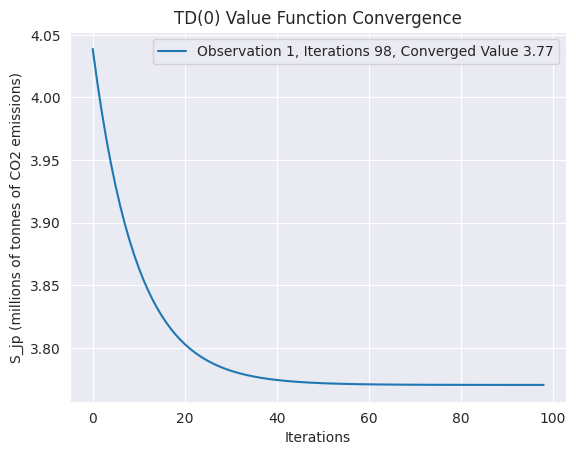

Converged in 98 iterations to value function 3770390


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Setting a random seed for reproducibility
np.random.seed(42)

current_year = datetime.now().year

# Initial variables
CFP_jp = 12/(10**6)
CFP_Bp = 388/(10**6)
Q_jp = 801540000
T_target = 2050


# Initial value function
# Note that you could initialize S_jp to 0, but it would take more iterations for convergence
S_jp = (CFP_Bp - CFP_jp) * Q_jp * (T_target - current_year) / 2

print(f"Initialization: S_jp = {int(S_jp)}, CFP_Bp = {CFP_Bp:.2e}, CFP_jp = {CFP_jp:.2e}, T_target = {T_target}, Q_jp = {int(Q_jp)}")

# We can use 0.01, 0,05, 0.1 or other low value of alpha. The value of S_jp at convergence will be the same,
# the only difference is that it would take more iterations for convergence
alpha = 0.1

# Observations
observations = [
  {'CFP_jp': np.random.normal(12/(10**6), 0.5*12/(10**6)),
   'CFP_Bp': np.random.normal(388/(10**6), 0.5*388/(10**6)),
   'Q_jp': np.random.normal(801540000, 0.01*801540000),
   'T_target': 2050},
]

# Maximum number of iterations
max_iterations = 1000

# Store summary for each observation
summary = [None] * len(observations)

# Track value function for each observation
S_jp_history_per_observation = [[] for _ in range(len(observations))]

# Track convergence
last_S_jp_per_observation = [float("inf") for _ in range(len(observations))]

iterations = 0
while iterations < max_iterations:

  converged = True

  for obs_idx, obs in enumerate(observations):

    # Update variables
    if 'CFP_Bp' in obs:
      CFP_Bp = obs['CFP_Bp']
    if 'CFP_jp' in obs:
      CFP_jp = obs['CFP_jp']
    if 'Q_jp' in obs:
      Q_jp = obs['Q_jp']
    if 'T_target' in obs:
      T_target = obs['T_target']

    # Calculate TD target
    new_S_jp = (CFP_Bp - CFP_jp) * Q_jp * (T_target - current_year) / 2

    # TD update
    S_jp = (1 - alpha) * S_jp + alpha * new_S_jp

    # Store the latest values for each observation
    summary[obs_idx] = (int(S_jp), CFP_Bp, CFP_jp, T_target, int(Q_jp))

    # Track value function for the current observation
    S_jp_history_per_observation[obs_idx].append(S_jp)

    # Check convergence for the current observation
    if abs(S_jp - last_S_jp_per_observation[obs_idx]) >= 1:
      converged = False

    # Update last value
    last_S_jp_per_observation[obs_idx] = S_jp

  if converged:
    break

  iterations += 1

# Print summary after convergence
for obs_idx, (s, cf_bp, cf_jp, t_t, q_jp) in enumerate(summary):
    print(f"Summary after observation {obs_idx + 1}: S_jp = {s}, CFP_Bp = {cf_bp:.2e}, CFP_jp = {cf_jp:.2e}, T_target = {t_t}, Q_jp = {q_jp}")

# Plot results for each observation
sns.set_style("darkgrid")
for obs_idx, S_jp_history in enumerate(S_jp_history_per_observation):
    total_iterations = len(S_jp_history) - 1 # Subtract 1 to match the print statement
    x = range(total_iterations + 1) # Add 1 to match the length of y
    y = [S / 1e6 for S in S_jp_history]  # Converting to millions

    # Include observation number, iterations, and converged value in the label
    converged_value = S_jp_history[-1] / 1e6
    label = f'Observation {obs_idx + 1}, Iterations {total_iterations}, Converged Value {converged_value:.2f}'
    sns.lineplot(x=x, y=y, label=label)

# Set labels and title
plt.xlabel('Iterations')
plt.ylabel('S_jp (millions of tonnes of CO2 emissions)')
plt.title('TD(0) Value Function Convergence')

# Adding a legend
plt.legend()

# Show integrated plot
plt.show()

print(f"Converged in {iterations} iterations to value function {int(S_jp)}")
